In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('Data/Breast Cancer Data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


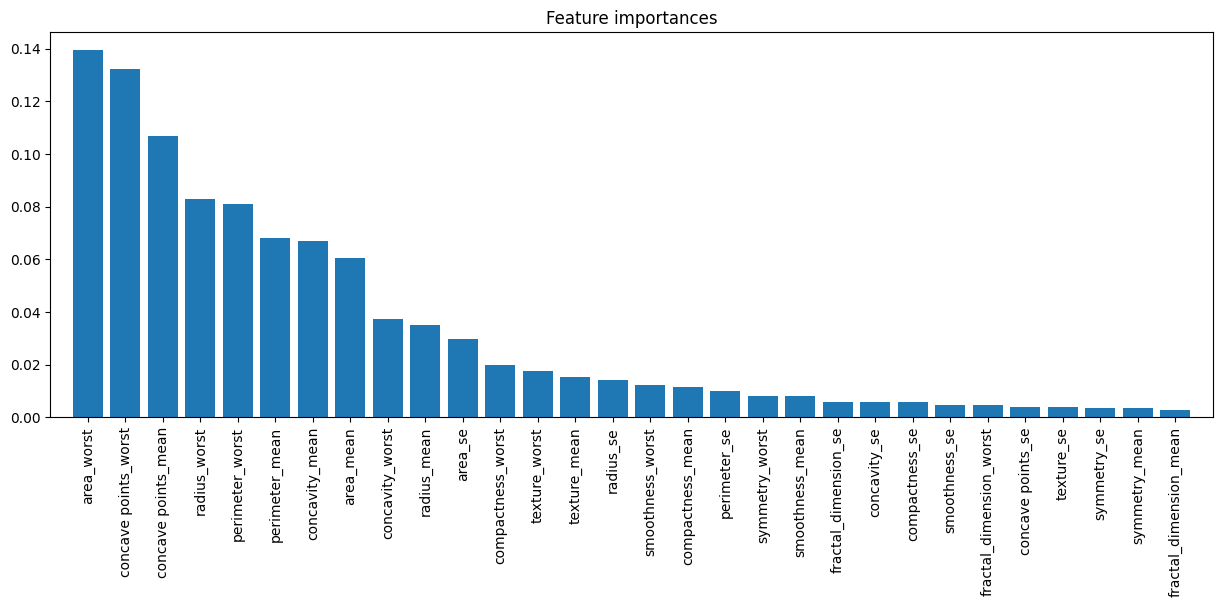

Selected top features:

 area_worst                 0.139357
concave points_worst       0.132225
concave points_mean        0.107046
radius_worst               0.082848
perimeter_worst            0.080850
perimeter_mean             0.067990
concavity_mean             0.066917
area_mean                  0.060462
concavity_worst            0.037339
radius_mean                0.034843
area_se                    0.029553
compactness_worst          0.019864
texture_worst              0.017485
texture_mean               0.015225
radius_se                  0.014264
smoothness_worst           0.012232
compactness_mean           0.011597
perimeter_se               0.010085
symmetry_worst             0.008179
smoothness_mean            0.007958
fractal_dimension_se       0.005942
concavity_se               0.005820
compactness_se             0.005612
smoothness_se              0.004722
fractal_dimension_worst    0.004497
concave points_se          0.003760
texture_se                 0.003744
sym

In [7]:

# Split data into features and target
X, y = data.drop(['diagnosis'], axis=1), data['diagnosis']

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_top_features = pd.Series(index=X.columns, data=rf.feature_importances_).sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(15, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), rf_top_features.values, align="center")
plt.xticks(range(X.shape[1]), rf_top_features.index, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Print selected top features
print("Selected top features:\n\n", rf_top_features)

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0.067016
fractal_dimension_mean     0

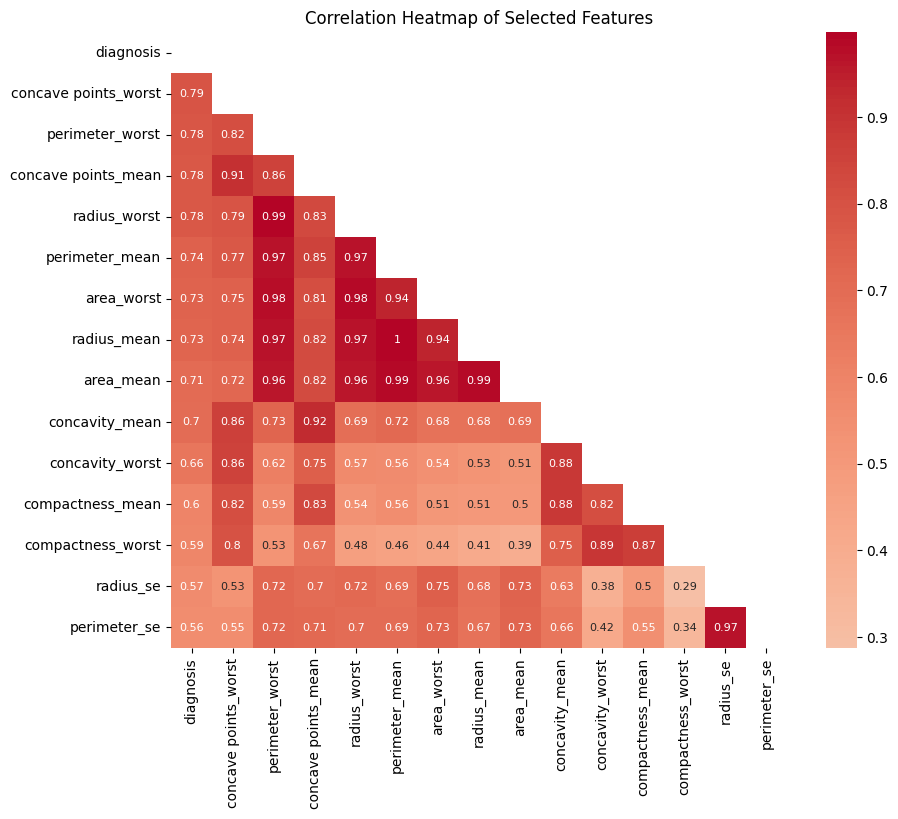

In [34]:
# Load the processed dataset
# data = pd.read_csv('../Data/Processed Breast Cancer Data.csv')

top_n_features = 15

# Compute the correlation matrix
corr_matrix = data.corr()

# Correlation with the target variable
corr_target = abs(corr_matrix["diagnosis"])

# Selecting highly correlated features
corr_top_features = corr_target.sort_values(ascending=False)
print(corr_top_features.drop('diagnosis'))

# Plot heatmap of selected features
plt.figure(figsize=(10, 8))
sns.heatmap(data[corr_top_features[:top_n_features].index].corr(), mask= np.triu(np.ones_like(data[corr_top_features[:top_n_features].index].corr(), dtype=bool)), cmap='coolwarm', annot_kws={"size": 8}, center=0, annot=True, square=True) 
plt.title("Correlation Heatmap of Selected Features")
plt.show()

corr_top_features.drop('diagnosis', inplace=True)

In [9]:
# Initialize the DataFrame with the combined features
feature_comparison = pd.DataFrame(list(set(corr_top_features.index).union(set(rf_top_features.index))), columns=['Feature'])

# Initialize the rank columns with NaN
feature_comparison['Correlation Rank'], feature_comparison['RF Importance Rank'], feature_comparison['Rank Difference'], feature_comparison['Diagnosis Correlation'], feature_comparison['RF Importance'], feature_comparison['Original Data Column Number'] = np.int16, np.int16, np.int16, np.float16, np.float16, np.int16

# Populate the ranks for corr_top_features
for (corr_rank, (corr_feature, corr_value)), (rf_rank, (rf_feature, rf_value)) in zip(enumerate(zip(corr_top_features.index, corr_top_features.values)), enumerate(zip(rf_top_features.index, rf_top_features.values))):
    
    feature_comparison.loc[feature_comparison['Feature'] == corr_feature, 'Correlation Rank'] = corr_rank + 1
    feature_comparison.loc[feature_comparison['Feature'] == rf_feature, 'RF Importance Rank'] = rf_rank + 1
      
    feature_comparison.loc[feature_comparison['Feature'] == corr_feature, 'Diagnosis Correlation'] = corr_value
    feature_comparison.loc[feature_comparison['Feature'] == rf_feature, 'RF Importance'] = rf_value
    
    feature_comparison.loc[feature_comparison['Feature'] == rf_feature, 'Original Data Column Number'] = [np.where(data.columns == rf_feature)[0][0] + 1][0]

feature_comparison['Rank Difference'] = np.abs(feature_comparison['Correlation Rank'] - feature_comparison['RF Importance Rank'])

# Display the DataFrame
feature_comparison.sort_values(by='Correlation Rank', inplace=True)
feature_comparison.reset_index(drop=True, inplace=True)
feature_comparison

,Feature,Correlation Rank,RF Importance Rank,Rank Difference,Diagnosis Correlation,RF Importance,Original Data Column Number
0,concave points_worst,1,2,1,0.793566,0.132225,29
1,perimeter_worst,2,5,3,0.782914,0.08085,24
2,concave points_mean,3,3,0,0.776614,0.107046,9
3,radius_worst,4,4,0,0.776454,0.082848,22
4,perimeter_mean,5,6,1,0.742636,0.06799,4
5,area_worst,6,1,5,0.733825,0.139357,25
6,radius_mean,7,10,3,0.730029,0.034843,2
7,area_mean,8,8,0,0.708984,0.060462,5
8,concavity_mean,9,7,2,0.69636,0.066917,8
9,concavity_worst,10,9,1,0.65961,0.037339,28


In [10]:
def n_feature_wrangling(top_n_features):
    print(f"\n\nFOR {top_n_features} FEATURES")
    all_features = np.union1d(list(rf_top_features.index[:top_n_features]), list(corr_top_features.index[:top_n_features]))
    common_features = np.intersect1d(list(rf_top_features.index[:top_n_features]), list(corr_top_features.index[:top_n_features]))
    uncommon_features = np.setdiff1d(np.union1d(list(rf_top_features.index[:top_n_features]), list(corr_top_features.index[:top_n_features])), common_features)

    print(f"Found {len(common_features)} out of {top_n_features} common features. Total of {len(all_features)} unique features found.")

    print("\nCommon features :\n")
    for index, feature in enumerate(common_features) : print(f"    {index+1}. {feature}")

    filtered_df = feature_comparison[feature_comparison['Feature'].isin(uncommon_features)]

    if len(uncommon_features):
        # Find the minimum 'Rank Difference'
        min_rank_diff = filtered_df['Rank Difference'].min()

        # Separate the features into two arrays
        min_rank_diff_feature = filtered_df[filtered_df['Rank Difference'] == min_rank_diff]['Feature'].values
        greater_than_min_rank_diff_features = filtered_df[filtered_df['Rank Difference'] > min_rank_diff]['Feature'].values

        print("\n\nUncommon features :\n")
        for index, feature in enumerate(uncommon_features) : print(f"    {index+1}. {feature} - RD: {filtered_df[filtered_df['Feature'] == feature]['Rank Difference'].values[0]}")

        print(f"Selecting {min_rank_diff_feature} and discarding {greater_than_min_rank_diff_features}")

        common_features = np.delete(all_features, np.where(all_features == greater_than_min_rank_diff_features)[0])

        data = data[np.append(common_features, ['smoothness_mean', 'diagnosis'])] 
        data.to_csv(f'Data/{top_n_features}-Features Processed Breast Cancer Data.csv', index=False)
            
        return data

In [11]:
# data.to_csv(f'Data/Processed Breast Cancer Data.csv')
# data2 = n_feature_wrangling(2)
# data5 = n_feature_wrangling(5)
# data10 = n_feature_wrangling(10)
# data15 = n_feature_wrangling(15)
# data20 = n_feature_wrangling(20)
# data25 = n_feature_wrangling(20)

data2 = pd.read_csv(f'Data/2-Features Processed Breast Cancer Data.csv')
data5 = pd.read_csv(f'Data/5-Features Processed Breast Cancer Data.csv')
data10 = pd.read_csv(f'Data/10-Features Processed Breast Cancer Data.csv')
data15 = pd.read_csv(f'Data/15-Features Processed Breast Cancer Data.csv')
data20 = pd.read_csv(f'Data/20-Features Processed Breast Cancer Data.csv')
data25 = pd.read_csv(f'Data/25-Features Processed Breast Cancer Data.csv')

In [12]:
data2.shape

(569, 3)

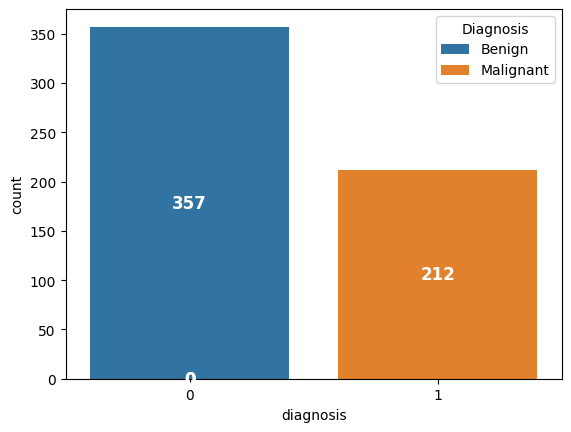

In [13]:
ax = sns.countplot(x='diagnosis', data=data, hue='diagnosis')

# Annotate the bars with the counts inside the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height() / 2.), 
                ha = 'center', va = 'center', color='white', fontsize=12, fontweight='bold')

# Custom legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Benign', 'Malignant'], title='Diagnosis')

# Show the plot
plt.show()

In [14]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [15]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


<Figure size 1000x3000 with 0 Axes>

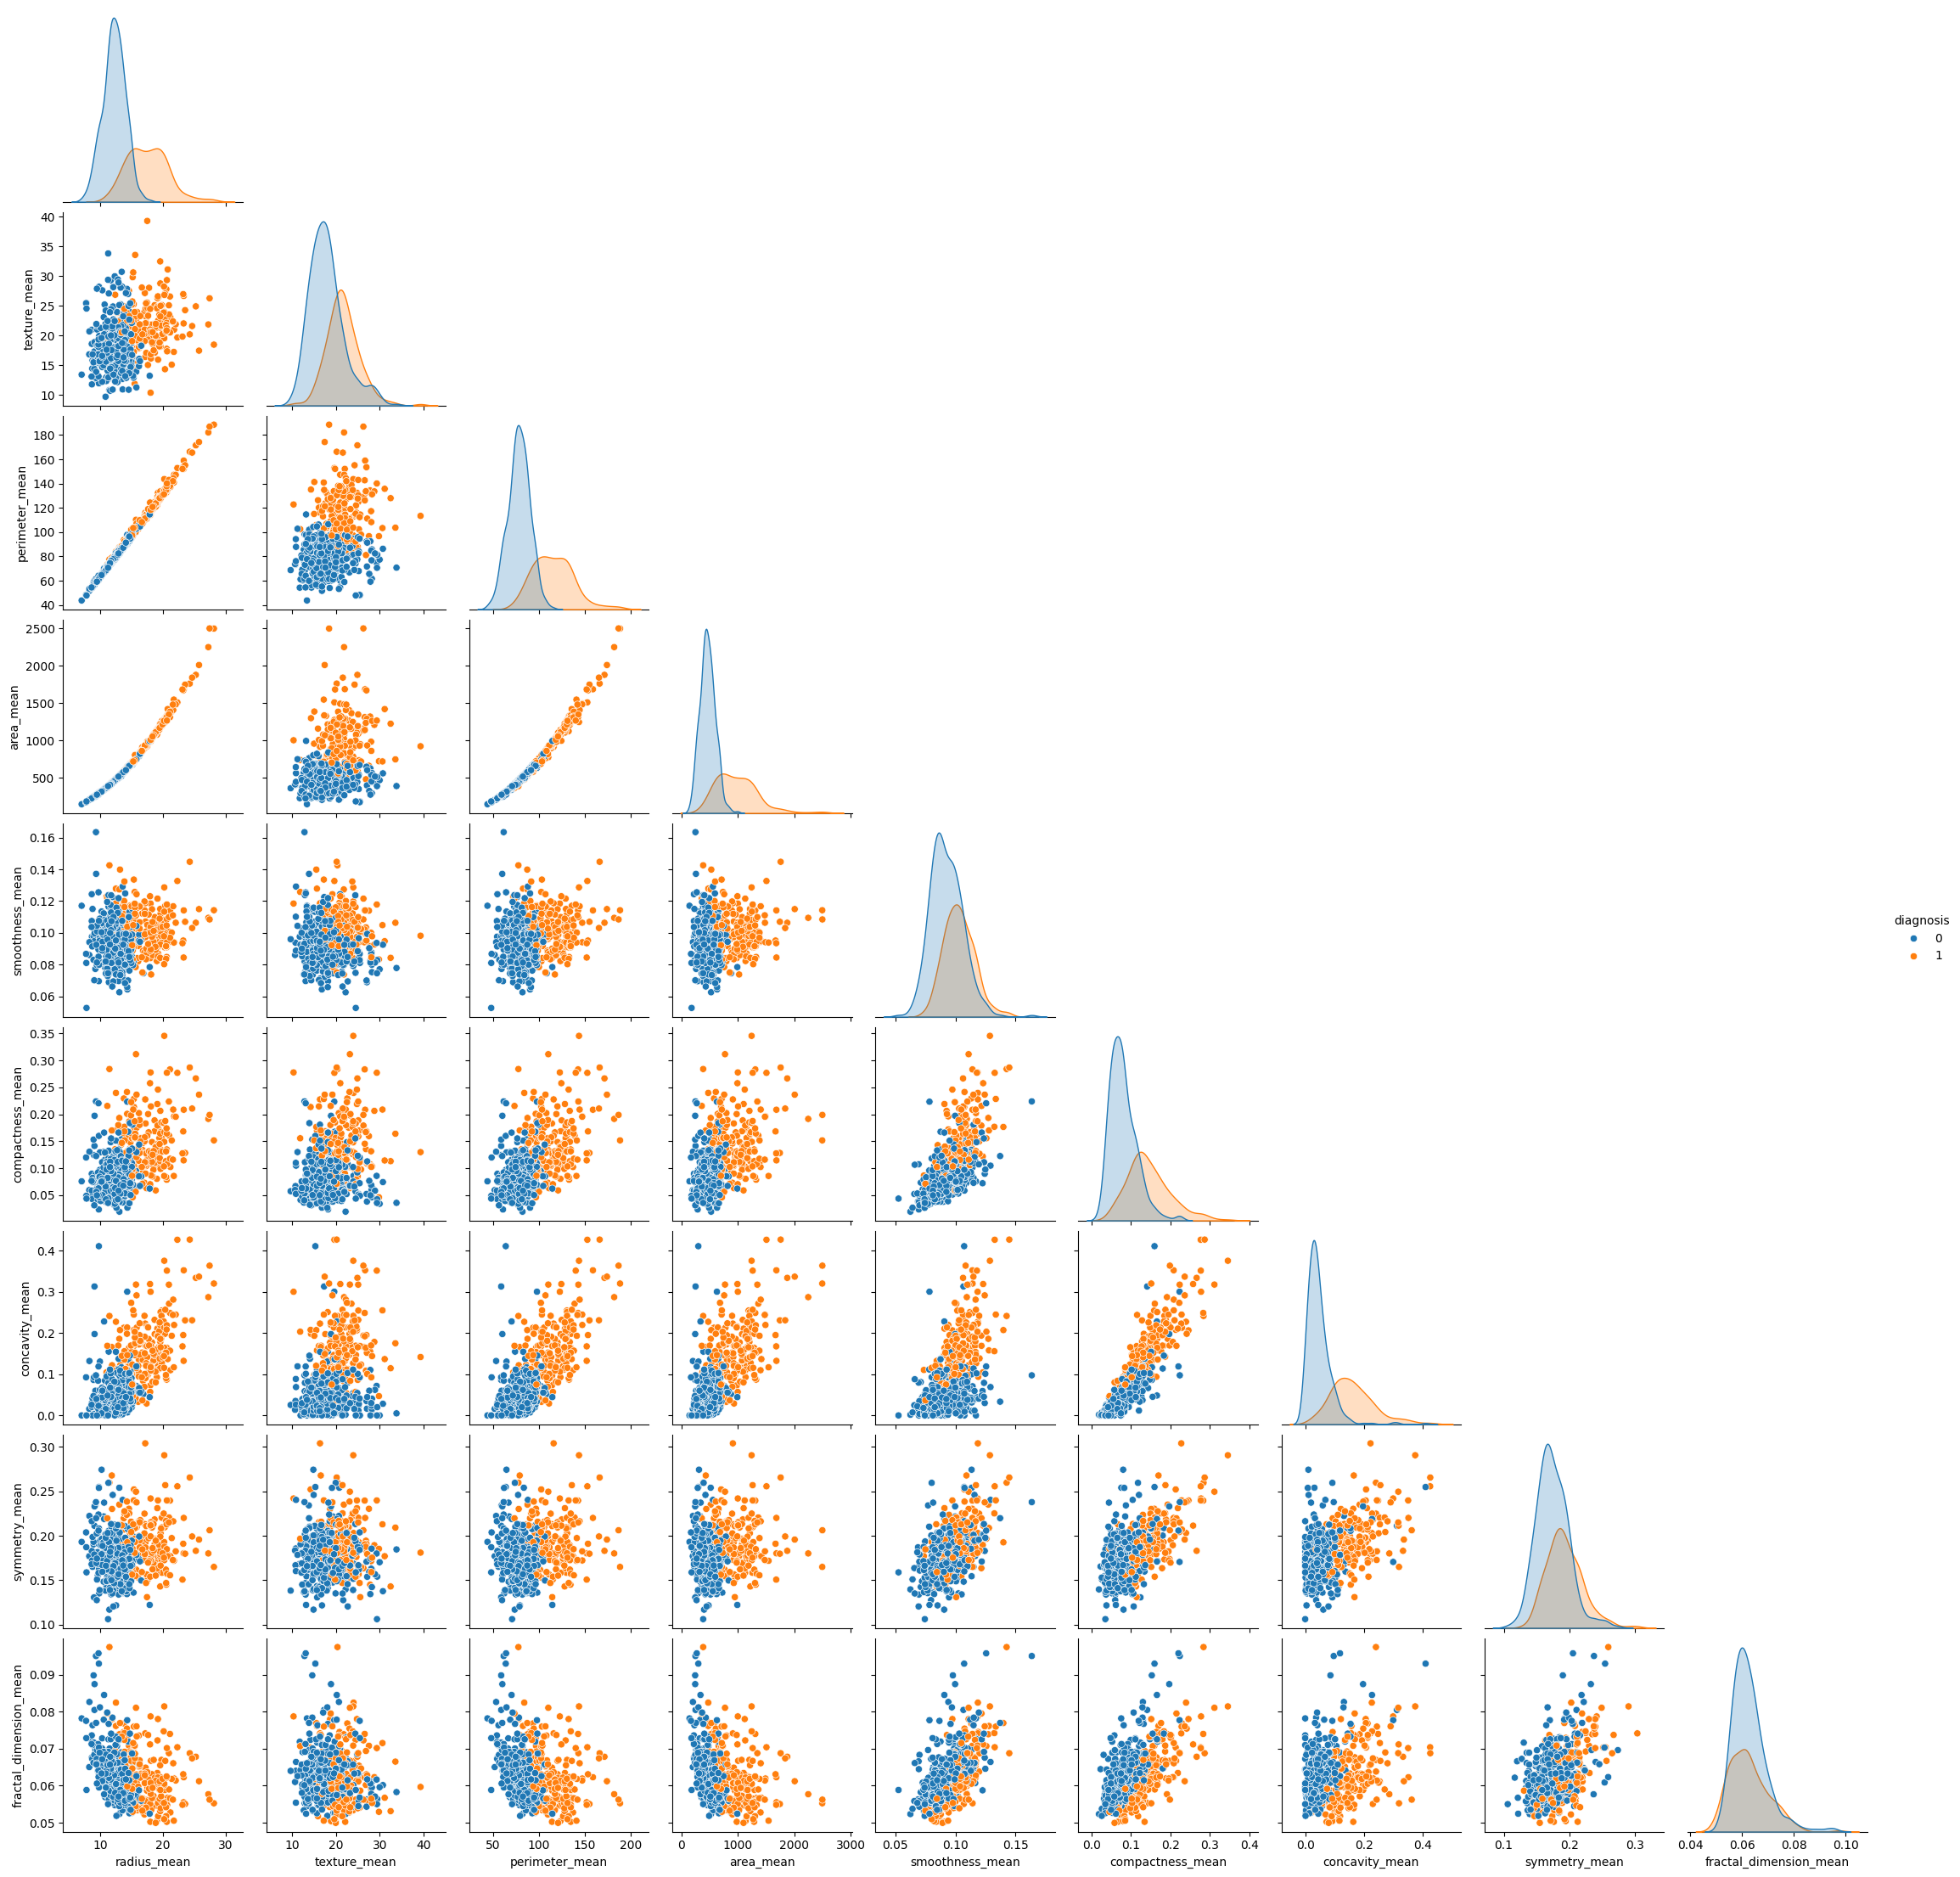

In [16]:
plt.figure(figsize = (10, 30))

sns.pairplot(data = data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']], hue = 'diagnosis', corner=True)
plt.show()

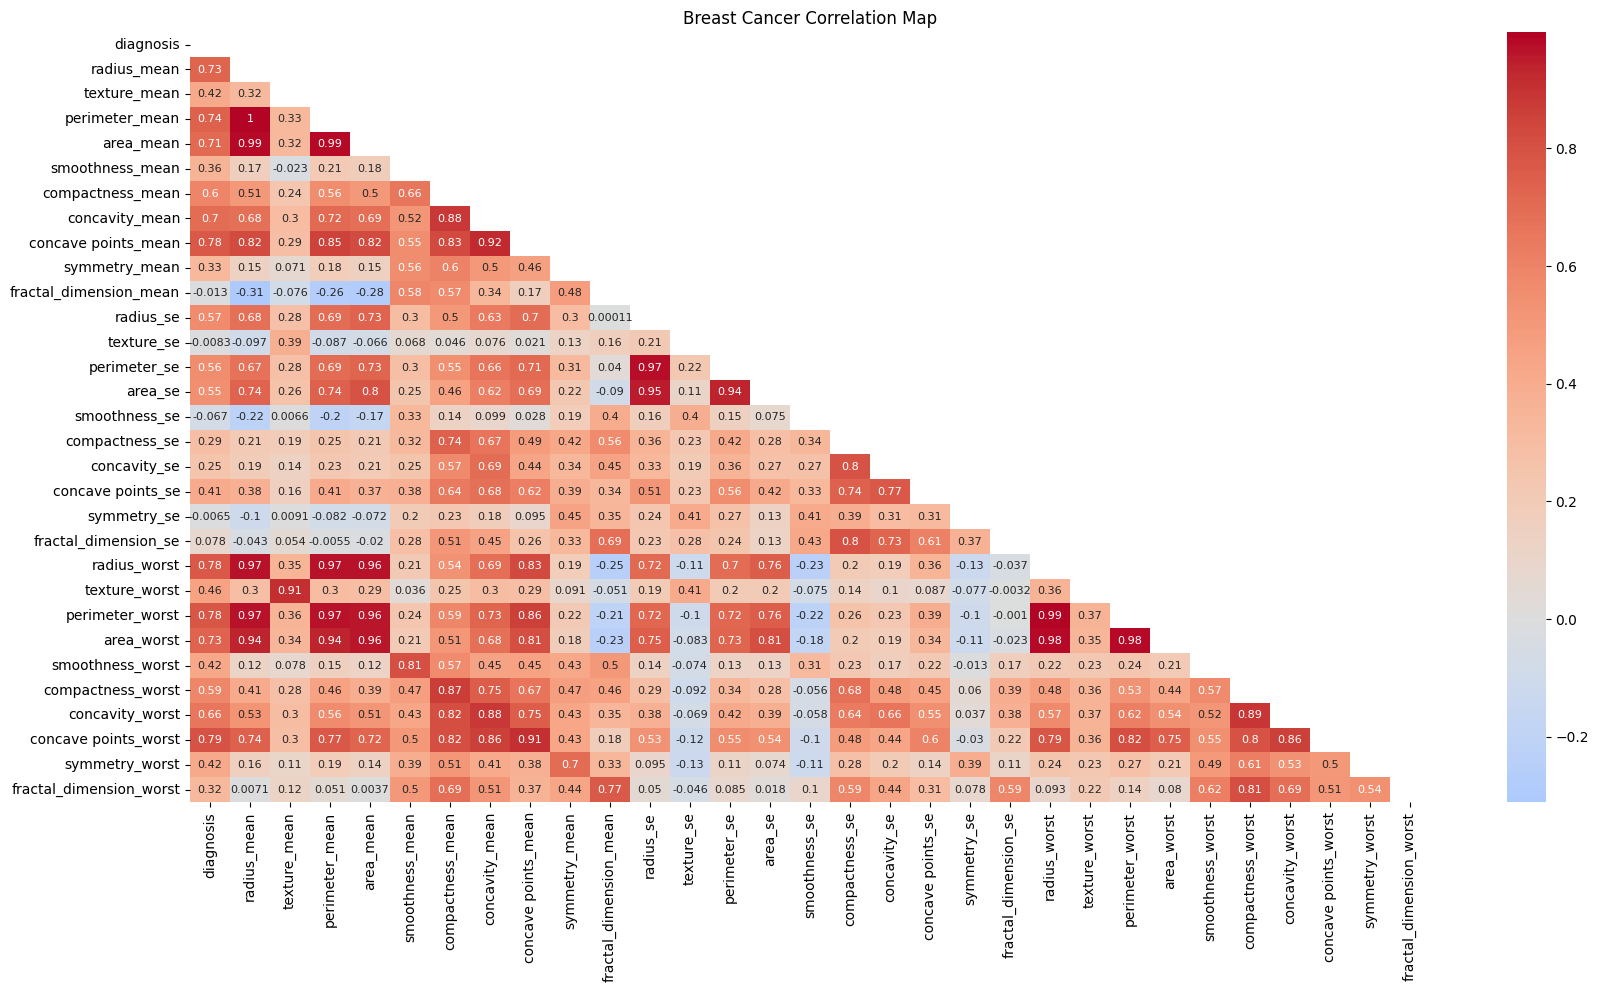

In [25]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), center=0, annot=True, mask= np.triu(np.ones_like(data.corr(), dtype=bool)), cmap='coolwarm', annot_kws={"size": 8}) 
plt.title('Breast Cancer Correlation Map')
plt.show()